In [1]:
import DirectDmTargets as dddm

calculating effective efficiency for Xe detector done
calculating effective efficiency for Ar detector done
calculating effective efficiency for Ge detector done


In [2]:
import corner

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
import os

In [6]:
import multihist as mh

In [7]:
!ls ../results/

archive		 emcee_restart36		     nestle_restart23
emcee_17nov0	 emcee_restart37		     nestle_restart26
emcee_17nov1	 emcee_restart38		     nestle_restart27
emcee_17nov2	 emcee_restart39		     nestle_restart33
emcee_17nov3	 emcee_restart40		     nestle_restart35
emcee_17nov4	 emcee_restart41		     nestle_restart36
emcee_17nov5	 emcee_restart42		     nestle_restart37
emcee_17nov6	 emcee_restart43		     nestle_restart38
emcee_17nov7	 emcee_restart6			     nestle_restart39
emcee_restart0	 emcee_restart9			     nestle_restart4
emcee_restart1	 everything_befor_this_time_testing  nestle_restart40
emcee_restart14  nestle0			     nestle_restart41
emcee_restart17  nestle1			     nestle_restart42
emcee_restart18  nestle2			     nestle_restart43
emcee_restart19  nestle_17nov0			     nestle_restart44
emcee_restart20  nestle_17nov1			     nestle_restart45
emcee_restart21  nestle_17nov10			     nestle_restart46
emcee_restart22  nestle_17nov11			     nestle_restart47
emcee_restart23  nestle_17nov2			  

In [8]:
# ??dddm.load_nestle_samples

In [9]:
results = {}
for i in range(200):
    try:
        results[i] = dddm.load_nestle_samples(
            "../../results/nestle_restart", i)
        print()
    except FileNotFoundError:
        pass
#         print(f"No result for {i}")
#     print()

load_nestle_samples::	loading results/../../results/nestle_restart0/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart4/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart7/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart8/
load_nestle_samples::	done loading
access result with:
['config', 'res_dict', 'h', 'logl', 'logvol', 'logz', 'logzerr', 'ncall', 'niter', 'samples', 'weights']

load_nestle_samples::	loading results/../../results/nestle_restart13/
load_nestl

In [10]:
results.keys()

dict_keys([0, 4, 7, 8, 13, 16, 17, 18, 23, 26, 27, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58])

In [11]:
selected_keys = []
for i in results.keys():
#     print(results[i]['config']['notes'])
#     if results[i]['res_dict']['nestle_nposterior'] < 1000:
#         print(results[i]['config']['notes'])
#     if 'nestle-extra_long' in results[i]['config']['notes']:
#         print(i, ",")
    if results[i]['config']['mw'] == np.log10(250
                                             ):
        if np.shape(results[i]['samples'])[-1] == 5:
            if results[i]['config']['n_energy_bins'] == 10:
                print(i,results[i]['config']['detector'])
#         path = "../results/nestle_restart" + str(i)
#         !rm -r $path
        selected_keys.append(i)
selected_keys

16 Xe
43 Ge
44 Ar


[8, 16, 23, 33, 36, 39, 43, 44, 49, 50, 54, 55]

In [12]:
np.shape(results[13]['samples'])[-1]

5

---0---


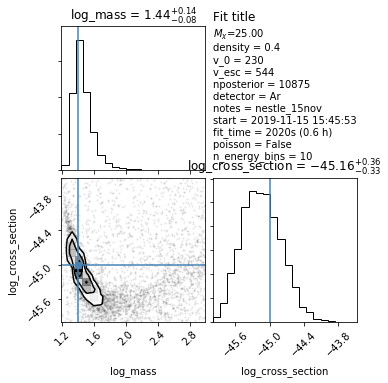

---4---


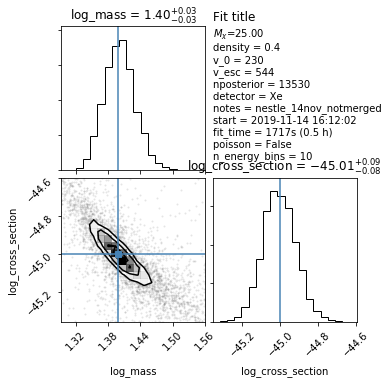

---7---


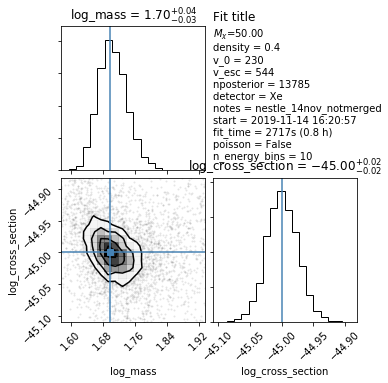

---8---


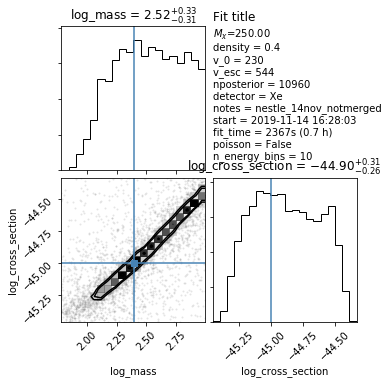

---13---


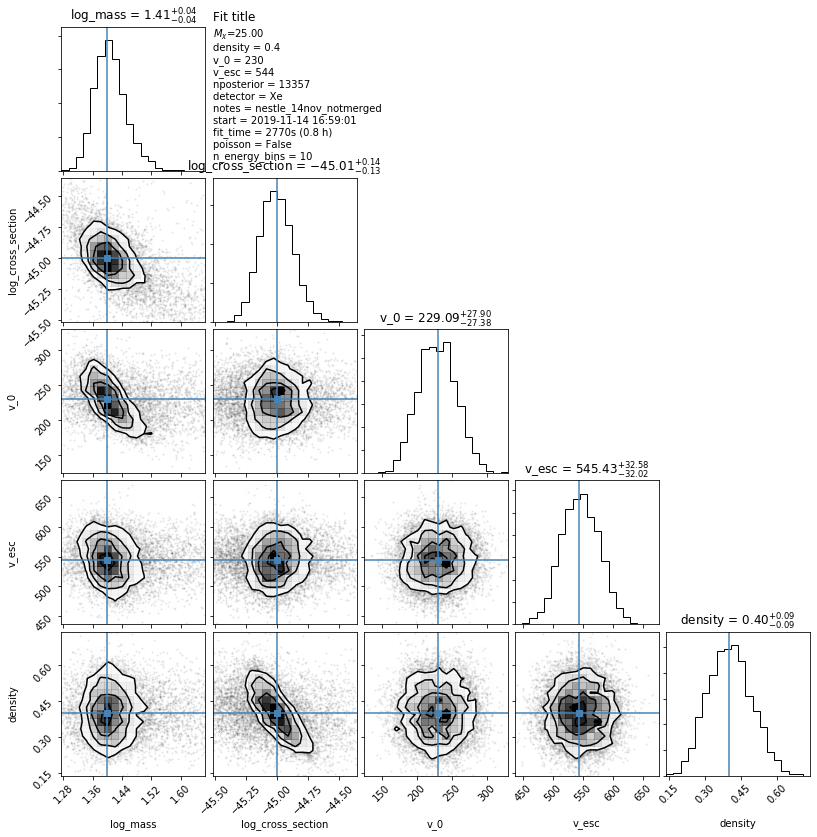

---16---


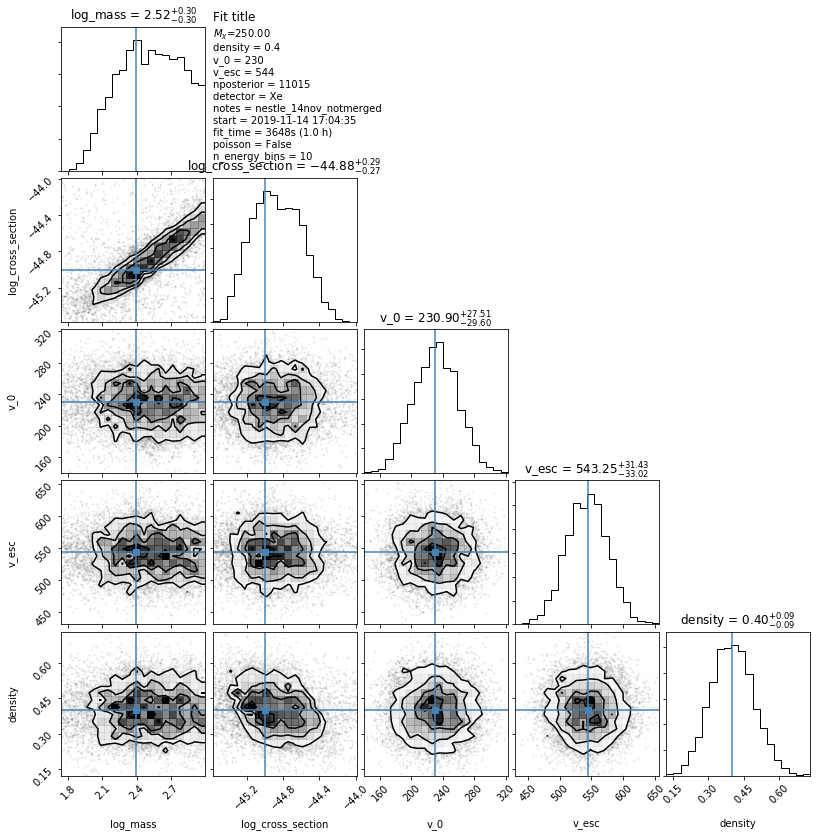

---17---


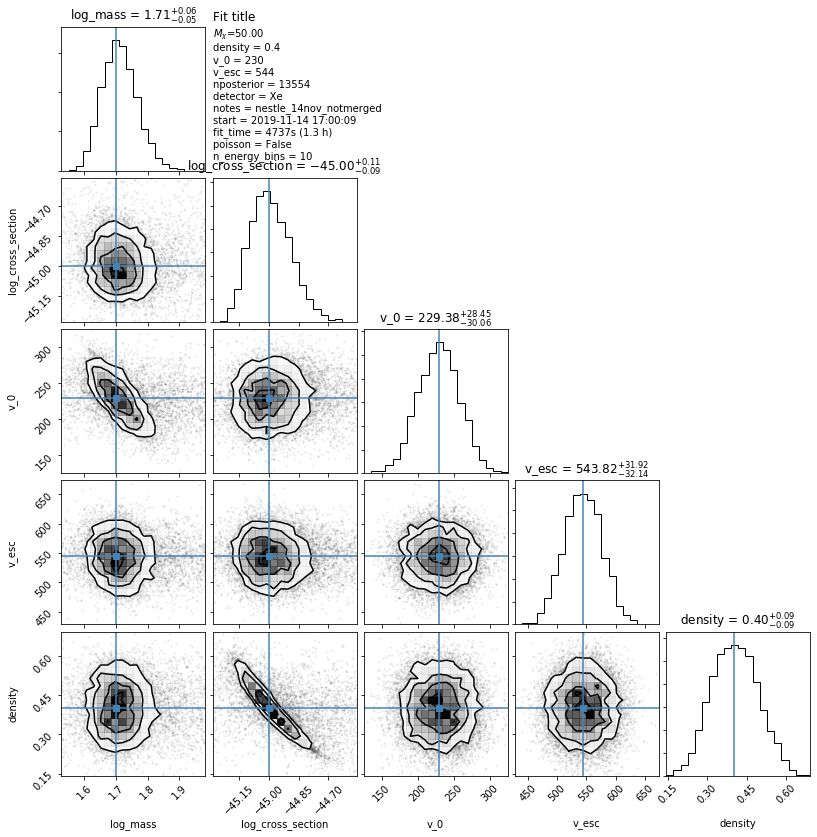

---18---


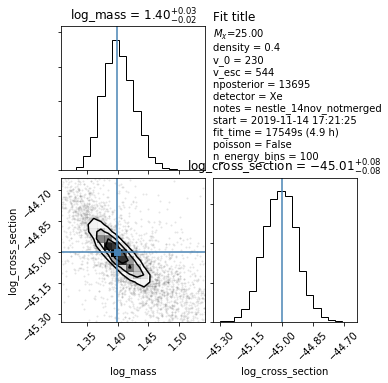

---23---


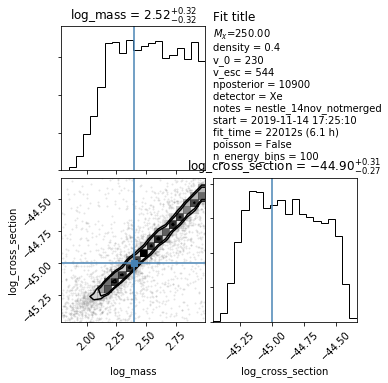

---26---


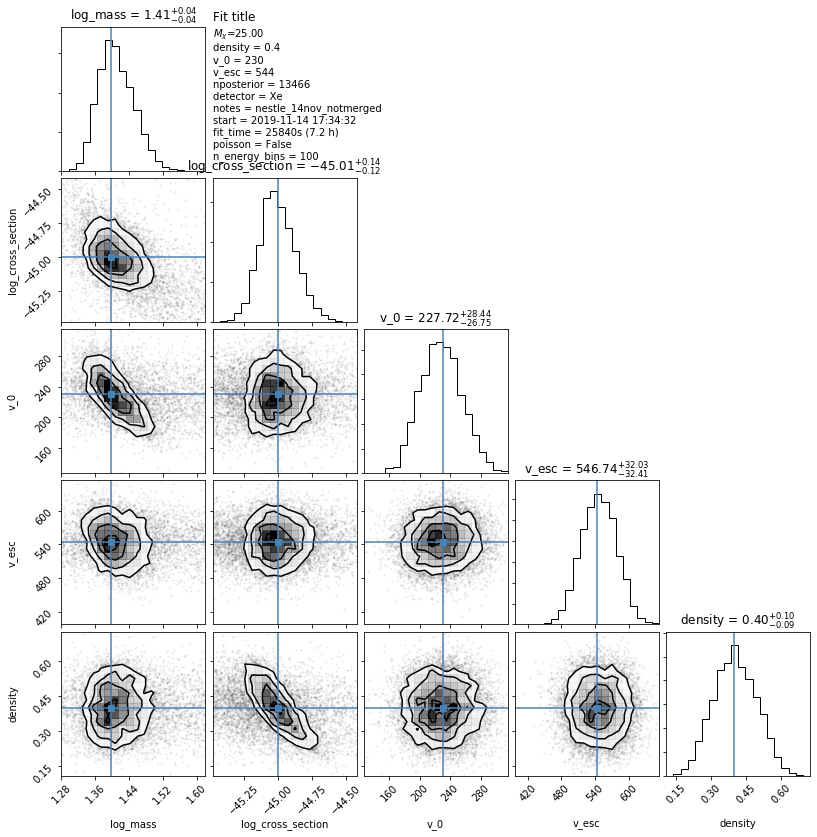

---27---


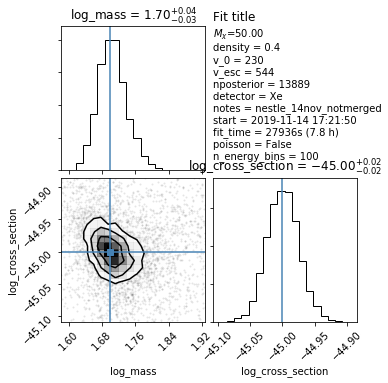

---33---


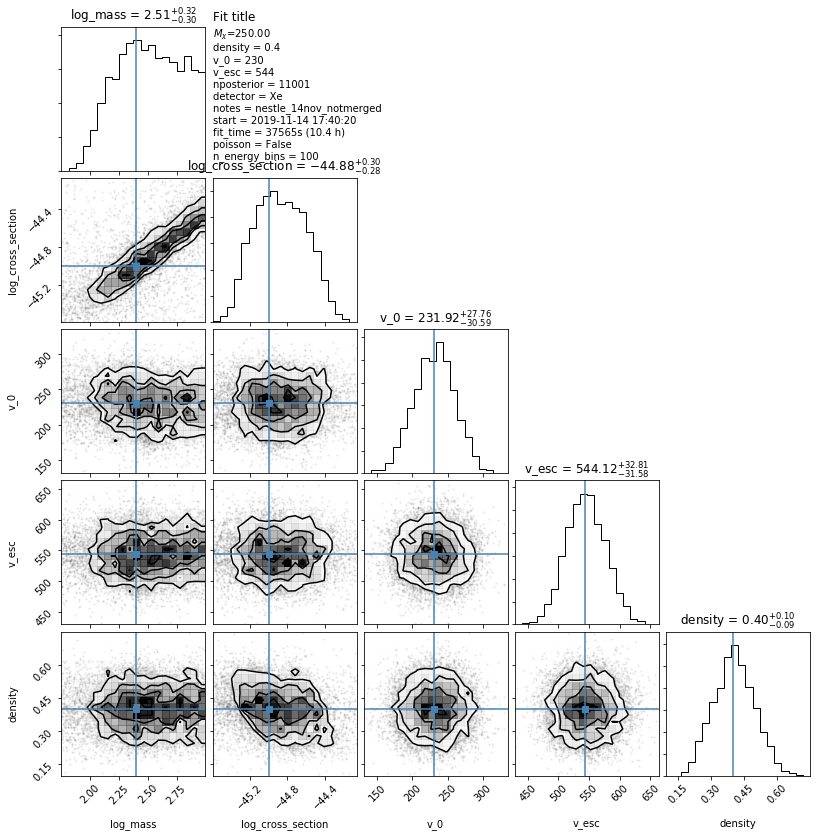

---35---


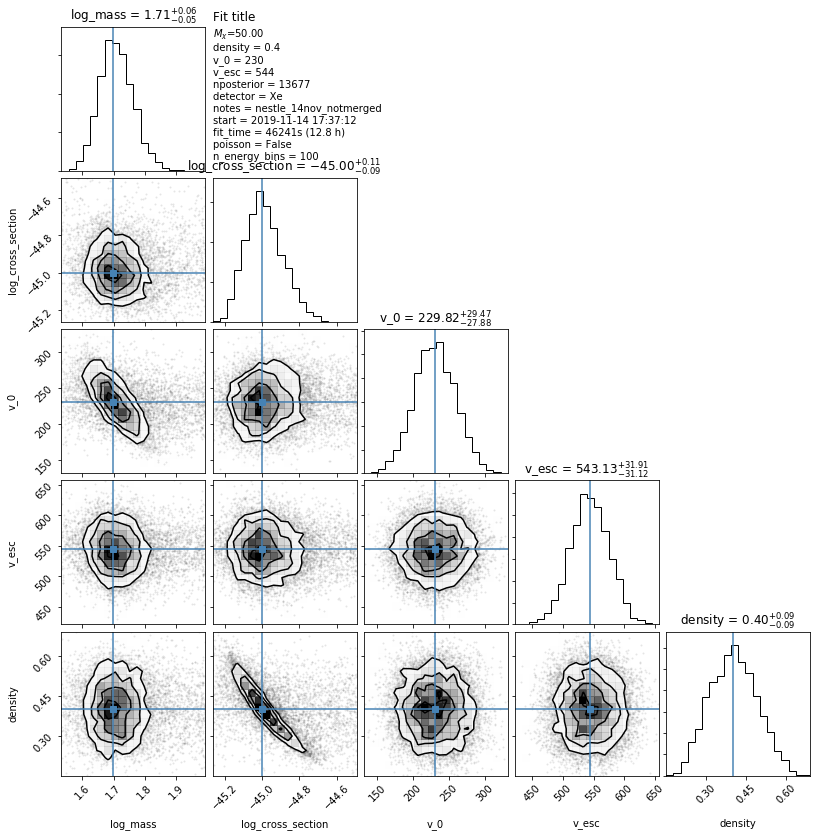

---36---


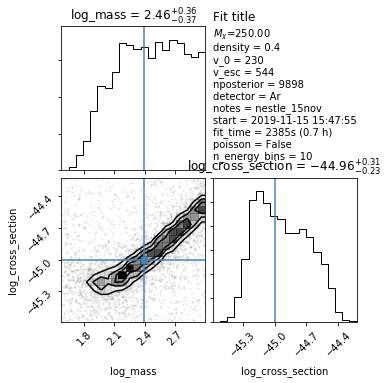

---37---


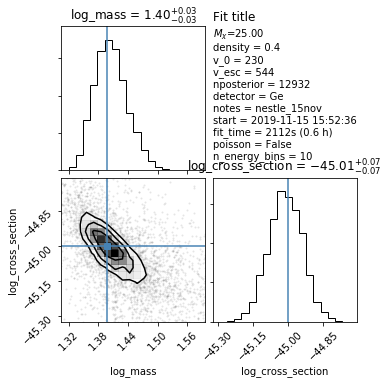

---38---


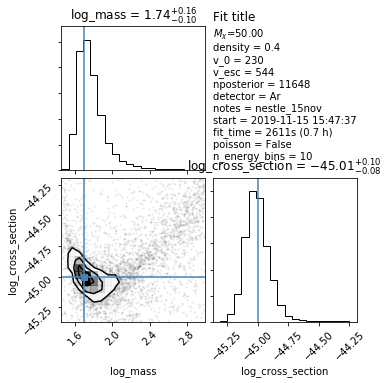

---39---


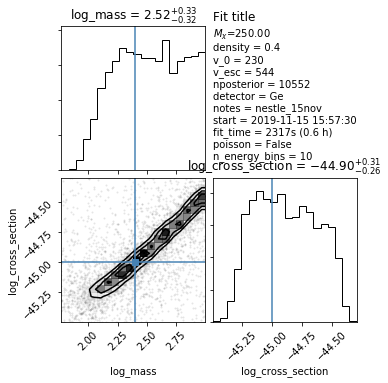

---40---


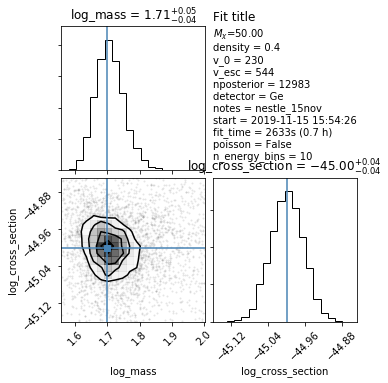

---41---


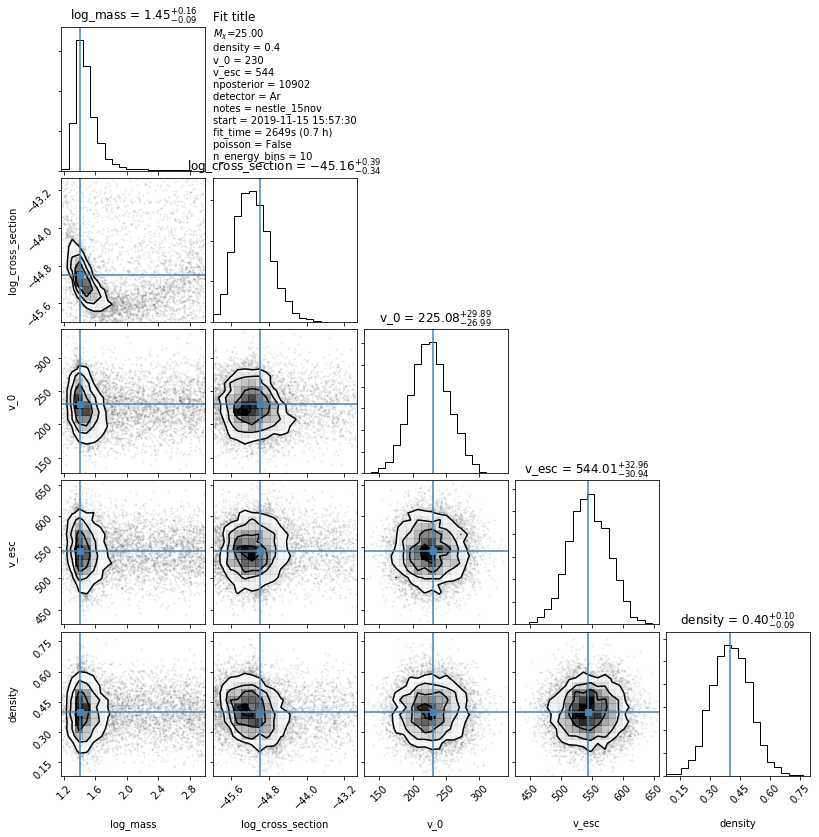

---42---


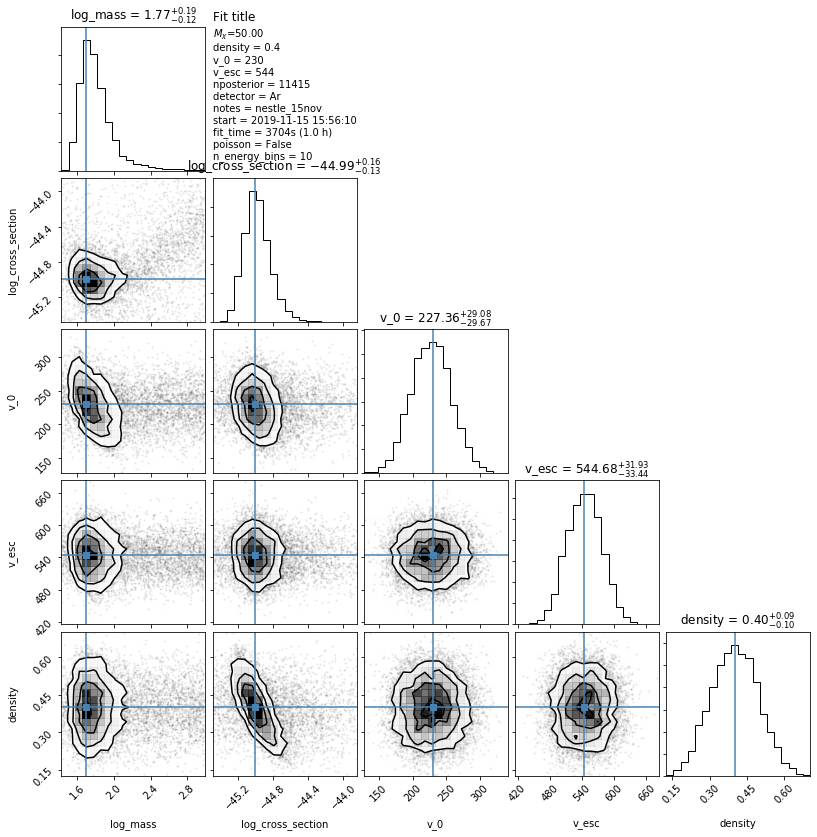

---43---


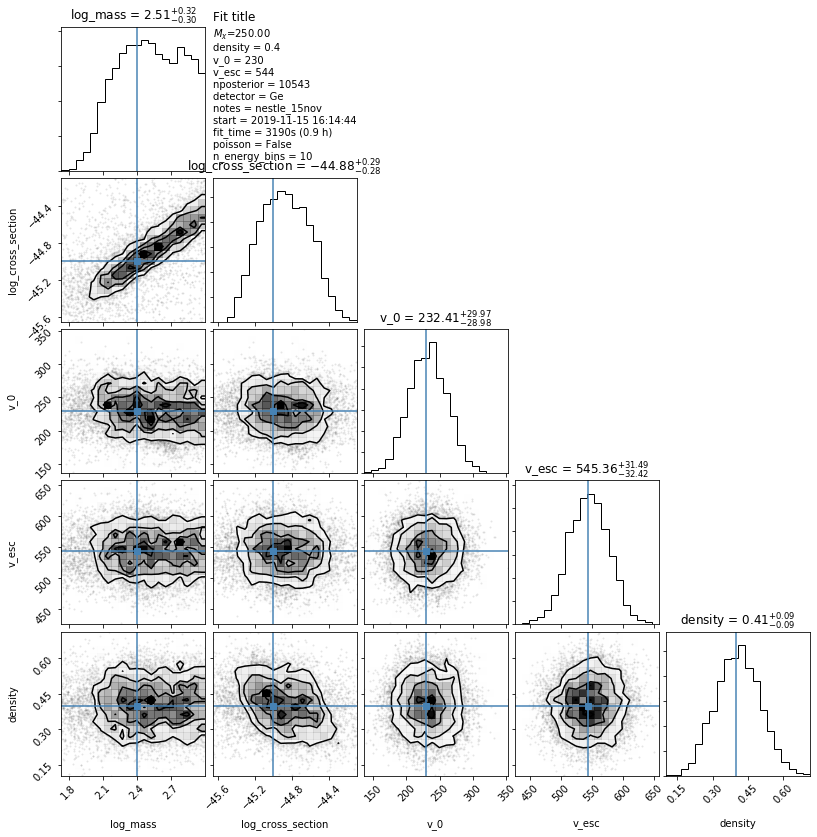

---44---


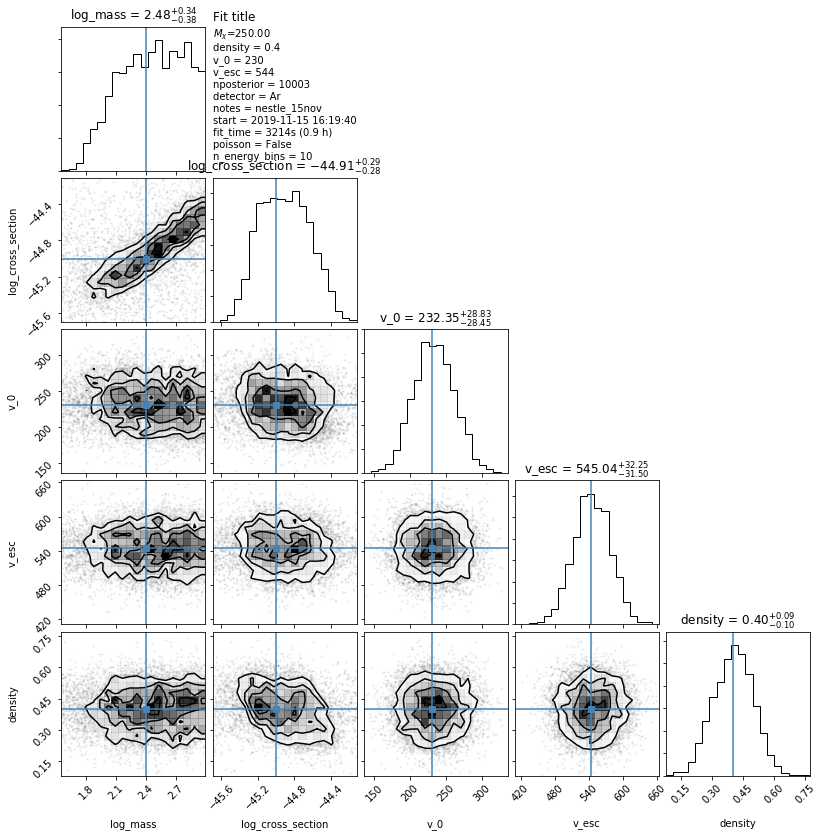

---45---


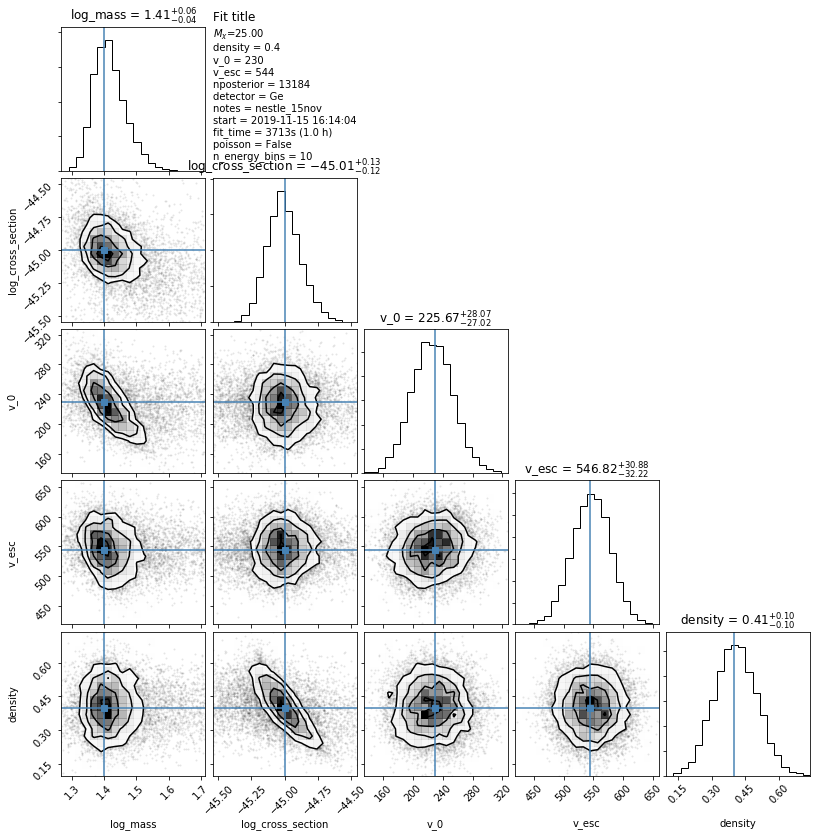

---46---


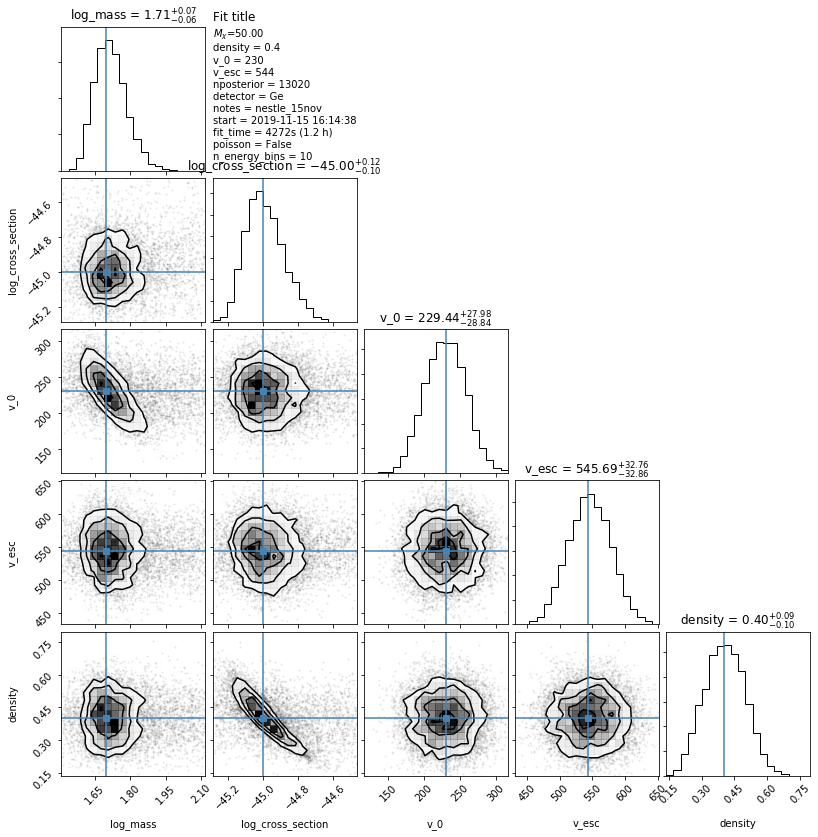

---47---


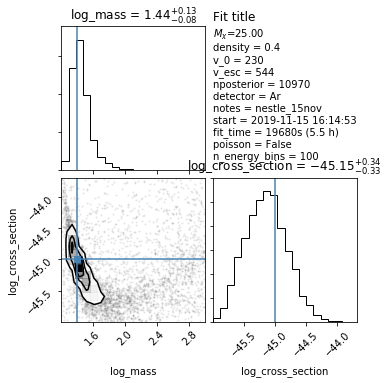

---48---


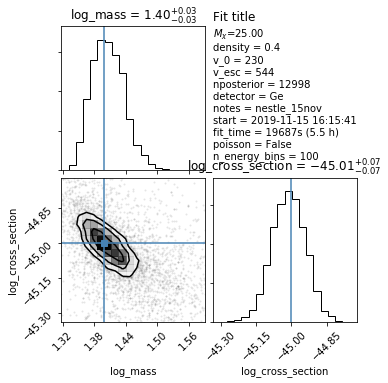

---49---


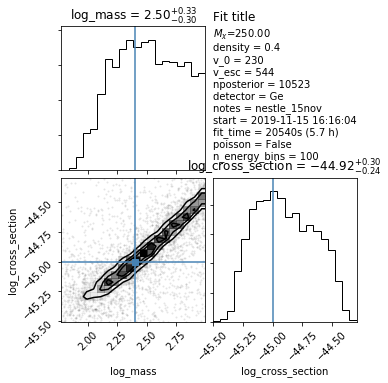

---50---


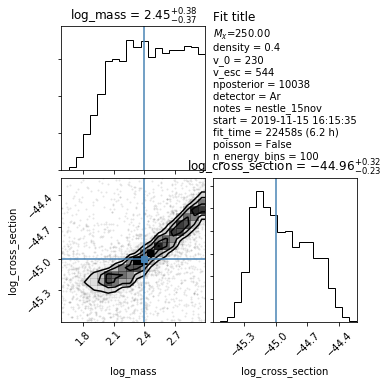

---51---


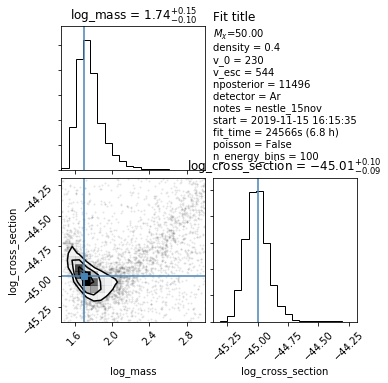

---52---


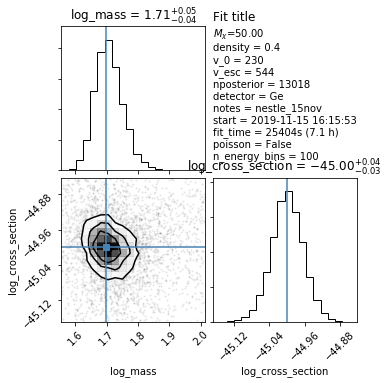

---53---


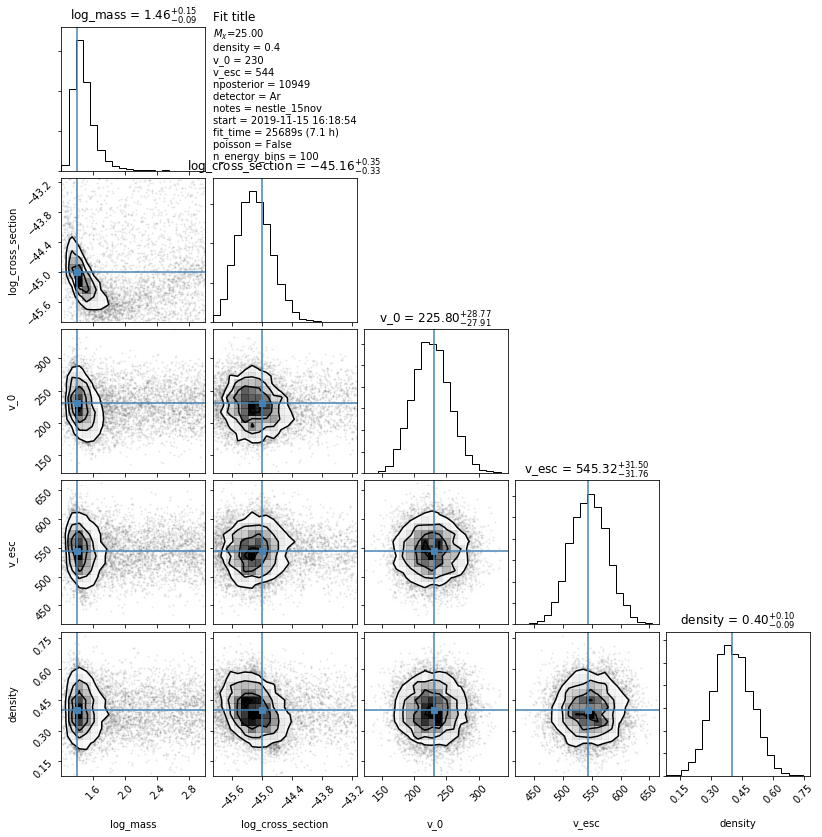

---54---


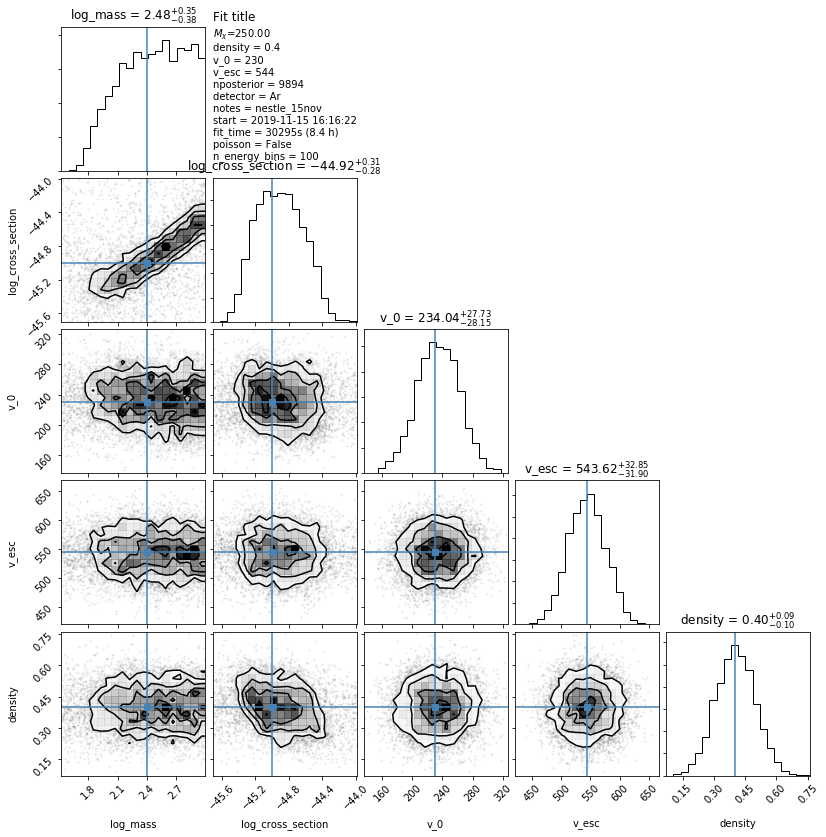

---55---


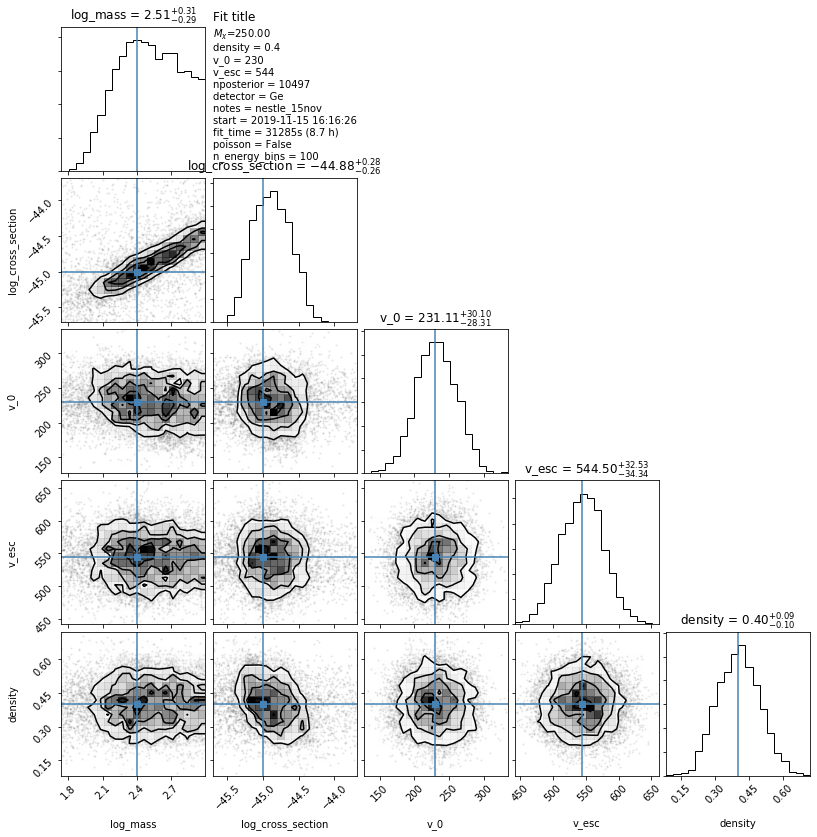

---56---


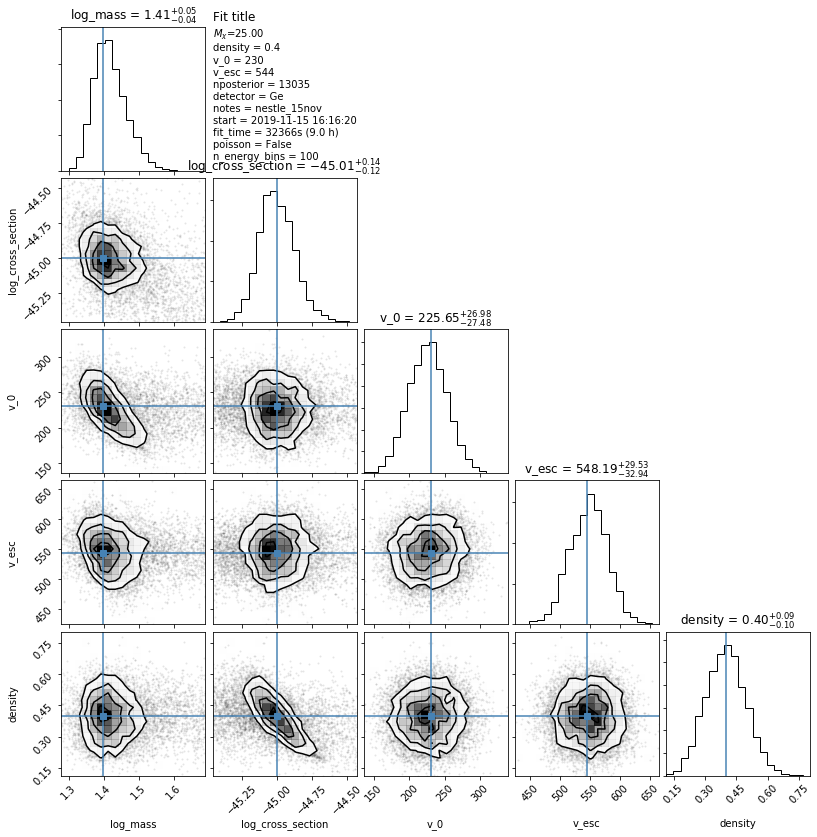

---57---


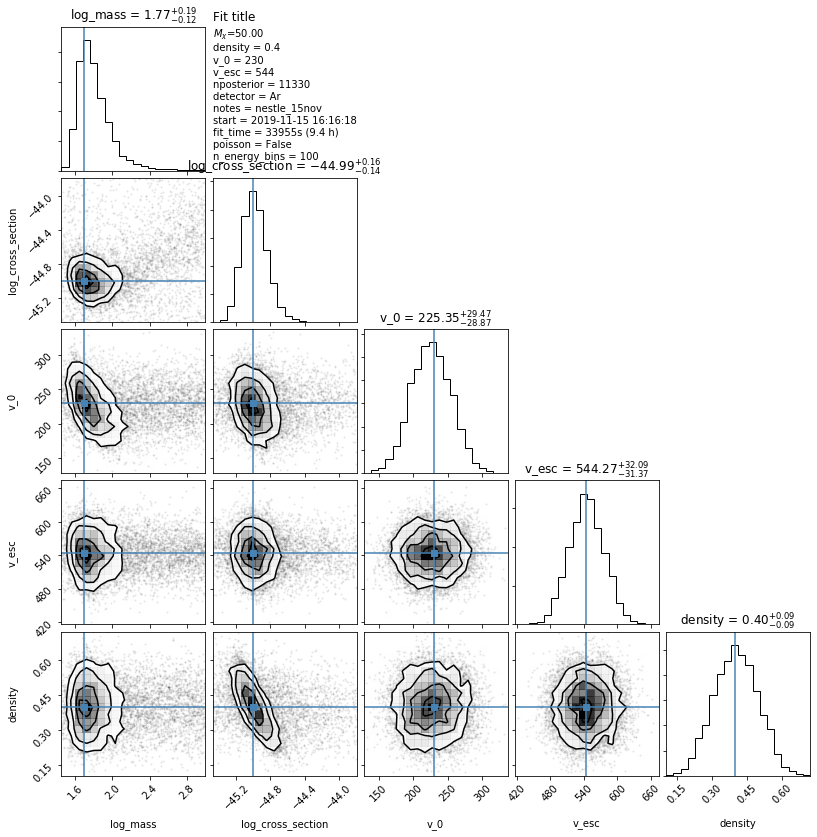

---58---


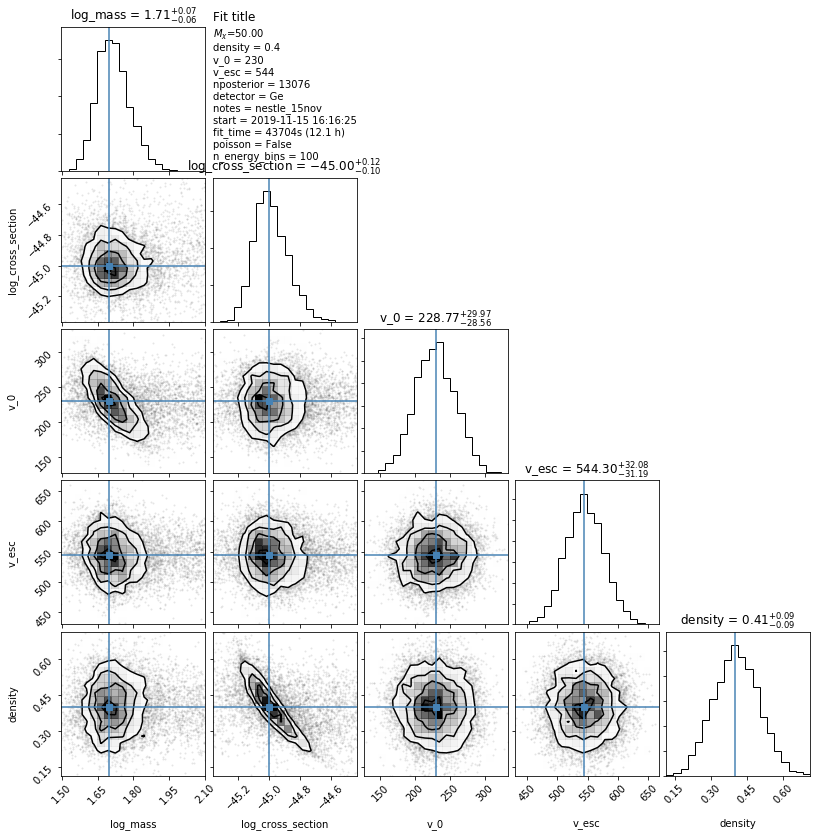

In [13]:
for key in results.keys():
# for key in selected_keys:
    print(f"---{key}---")
    result = results[key]
    dddm.nestle_corner(result)

In [14]:
# selected_keys = []
# for i in results.keys():
# #     print(results[i]['config']['notes'])
# #     if results[i]['res_dict']['nestle_nposterior'] < 1000:
# #         print(results[i]['config']['notes'])
# #     if 'nestle-extra_long' in results[i]['config']['notes']:
# #         print(i, ",")
#     if results[i]['config']['n_energy_bins'] == 100:
#         selected_keys.append(i)
# selected_keys
# # for key in results.keys():
# for key in selected_keys:
#     print(f"---{key}---")
#     result = results[key]
#     dddm.nestle_corner(result)

In [15]:
def get_posterior(samples, weights):
    # re-scale weights to have a maximum of one
    nweights = weights/np.max(weights)

    # get the probability of keeping a sample from the weights
    keepidx = np.where(np.random.rand(len(nweights)) < nweights)[0]
    # get the posterior samples
    return samples[keepidx,:]


In [16]:
# np.shape(np.random.normal(1, 1, 10**6))


In [17]:
def show_combined_results(items):
    nbins = 45
    bin_range = [[1, 3], [-45.7, -44.3]]
    m2 = mh.Histdd(bins=nbins, range=bin_range, axis_names=['x', 'y'])
    for i in items:
        print(results[i]['config']['detector'])
        xbins, ybins = bin_range
        result = get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
        counts, _, _ = np.histogram2d(*result, nbins, 
                                range = bin_range, normed = True) 
        cont = plt.contour(counts.T,
                extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                           linewidths=1, cmap = plt.cm.rainbow, 
                           levels = [5, 95])

        m2.add(*result)

    artists, labels = cont.legend_elements()
    plt.legend(artists, labels, handleheight=2, loc = "lower right")

    plt.axvline(np.log10(25), c = 'r')
    plt.axvline(np.log10(50), c = 'r')
    plt.axvline(np.log10(250), c = 'r')
    plt.axhline(-45, c = 'r')
#     m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
#     m2.plot(log_scale = True)

    plt.show()

Ar


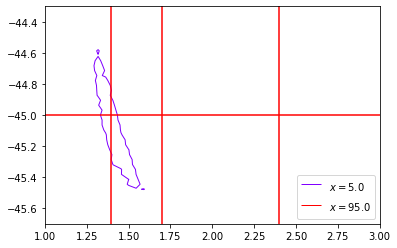

In [18]:
items = [0]
show_combined_results(items)

Ar


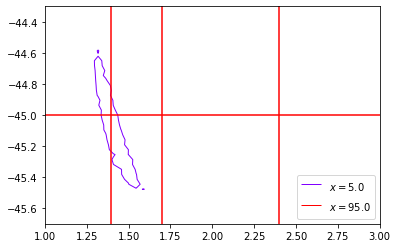

Ar


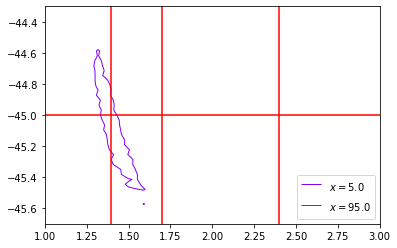

In [19]:
items = [0]
for item in items:
    show_combined_results([item])
show_combined_results(items)

In [20]:
def show_combined_likelihood(items):
    nbins = 45
    bin_range = [[1, 3], [-45.7, -44.3]]
    m2 = mh.Histdd(bins=nbins, range=bin_range, axis_names=['x', 'y'])
    for i in items:
        print(results[i]['config']['detector'])
        xbins, ybins = bin_range
        result = get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
        counts, _, _ = np.histogram2d(*result, nbins, 
                                range = bin_range, normed = False) 
        cont = plt.contour(counts.T,
                extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                           linewidths=1, cmap = plt.cm.rainbow, 
                           levels = [5, 95])

        m2.add(*result)
        if i == items[0]:
            m2.plot(log_scale = True)
    
#     m2.plot(log_scale = True)

    artists, labels = cont.legend_elements()
    plt.legend(artists, labels, handleheight=2, loc = "lower right")
    plt.axvline(np.log10(25), c = 'r')
    plt.axvline(np.log10(50), c = 'r')
    plt.axvline(np.log10(250), c = 'r')
    plt.axhline(-45, c = 'r')
    plt.show()



    counts = m2.histogram
    cont2 = plt.contour(counts.T,
            extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                       linewidths=1, cmap = plt.cm.rainbow, 
                       levels = [5, 95])

    artists, labels = cont2.legend_elements()
    plt.legend(artists, labels, handleheight=2, loc = "upper right")
    plt.axvline(np.log10(25), c = 'r')
    plt.axvline(np.log10(50), c = 'r')
    plt.axvline(np.log10(250), c = 'r')
    plt.axhline(-45, c = 'r')
    #     m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
    m2.plot(log_scale = True)

    plt.show()


Xe
Ar
Ge


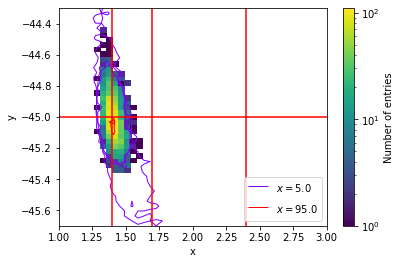

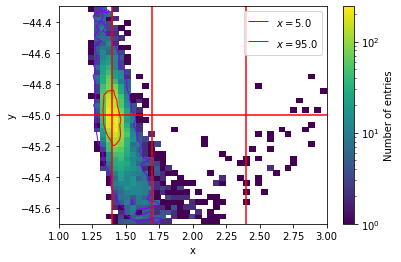

In [21]:
items = [13, 41, 45]
show_combined_likelihood(items)

Xe
Ge
Ar


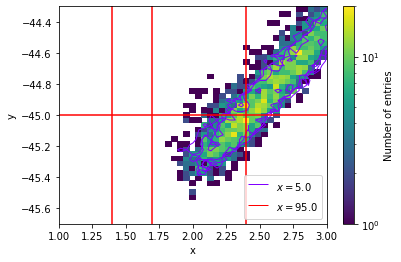

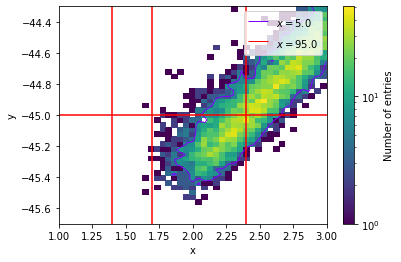

In [22]:
items = [16,43,44]
show_combined_likelihood(items)

In [23]:
from scipy.stats.mstats import mquantiles

Xe
Ge
Ar


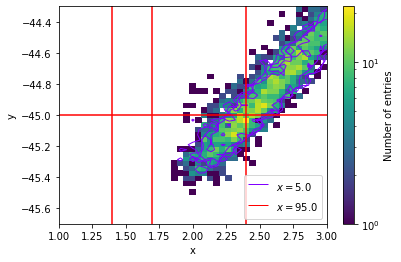

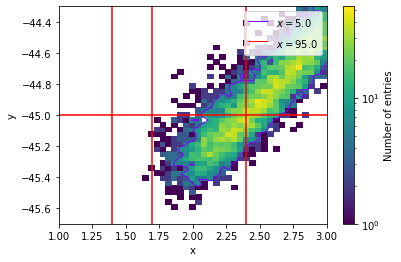

In [24]:
# def show_combined_likelihood(items):
nbins = 45
bin_range = [[1, 3], [-45.7, -44.3]]
m2 = mh.Histdd(bins=nbins, range=bin_range, axis_names=['x', 'y'])
for i in items:
    print(results[i]['config']['detector'])
    xbins, ybins = bin_range
    result = get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
    counts, _, _ = np.histogram2d(*result, nbins, 
                            range = bin_range, normed = False) 
    cont = plt.contour(counts.T,
            extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                       linewidths=1, cmap = plt.cm.rainbow, 
                       levels = [5, 95])

    m2.add(*result)
    if i == items[0]:
        m2.plot(log_scale = True)

#     m2.plot(log_scale = True)

artists, labels = cont.legend_elements()
plt.legend(artists, labels, handleheight=2, loc = "lower right")
plt.axvline(np.log10(25), c = 'r')
plt.axvline(np.log10(50), c = 'r')
plt.axvline(np.log10(250), c = 'r')
plt.axhline(-45, c = 'r')
plt.show()



counts = m2.histogram
cont2 = plt.contour(counts.T,
        extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
                   linewidths=1, cmap = plt.cm.rainbow, 
                   levels = [5, 95])

artists, labels = cont2.legend_elements()
plt.legend(artists, labels, handleheight=2, loc = "upper right")
plt.axvline(np.log10(25), c = 'r')
plt.axvline(np.log10(50), c = 'r')
plt.axvline(np.log10(250), c = 'r')
plt.axhline(-45, c = 'r')
#     m2.add(np.random.normal(-2, 1, 10**6), np.random.normal(2, 1, 10**6))
m2.plot(log_scale = True)

plt.show()


In [25]:
# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy import stats
# https://seaborn.pydata.org/tutorial/distributions.html

In [26]:
# for i in items:
test = get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
counts, _, _ = np.histogram2d(*test, nbins, 
                            range = bin_range, normed = False) 

In [27]:
np.percentile(counts, 50, axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

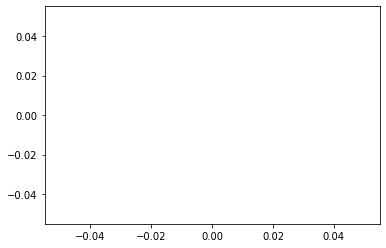

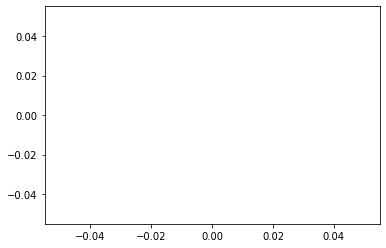

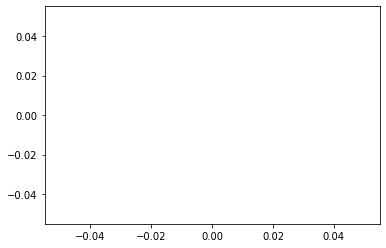

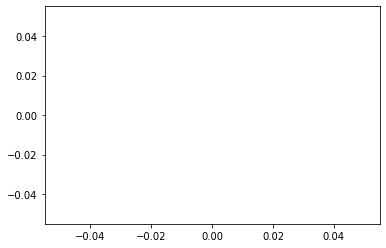

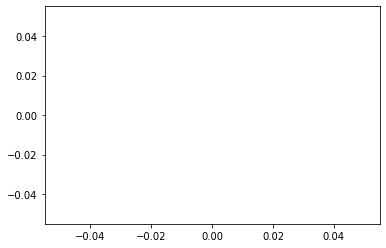

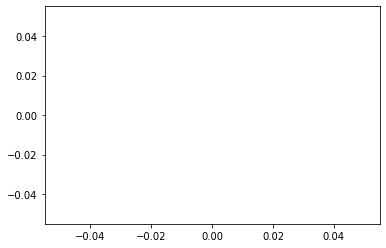

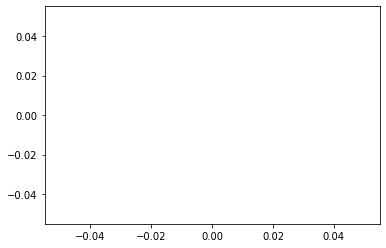

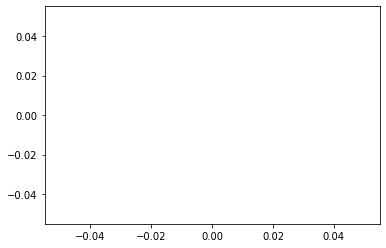

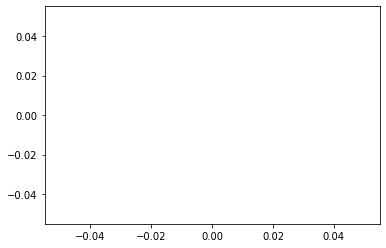

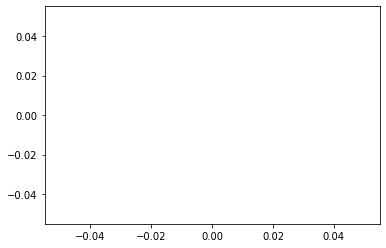

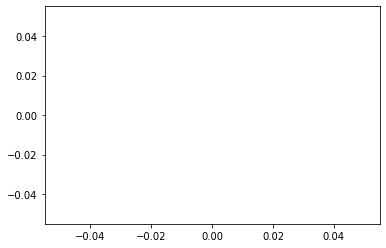

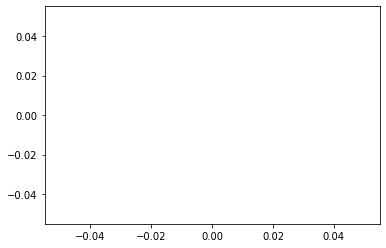

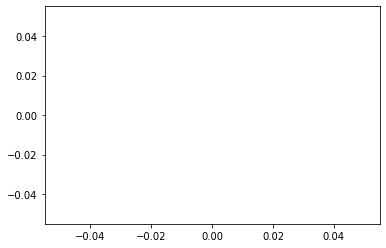

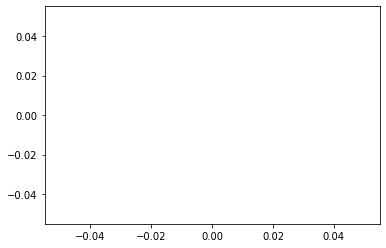

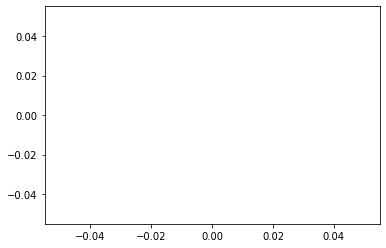

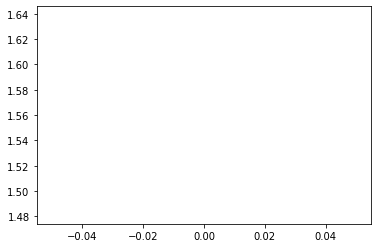

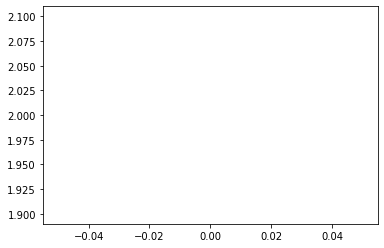

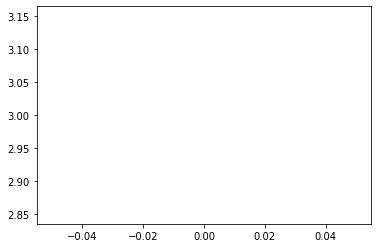

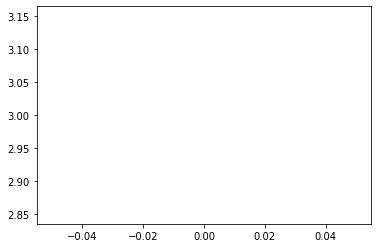

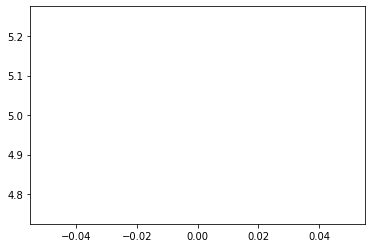

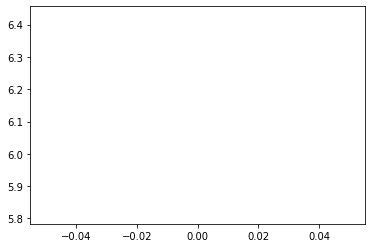

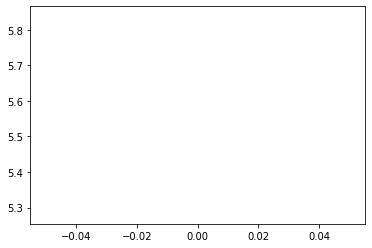

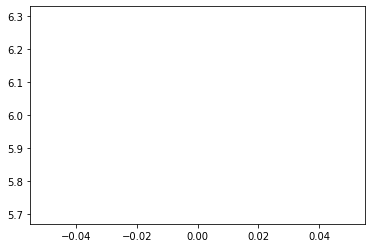

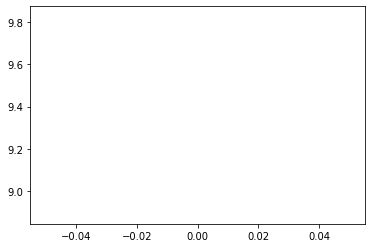

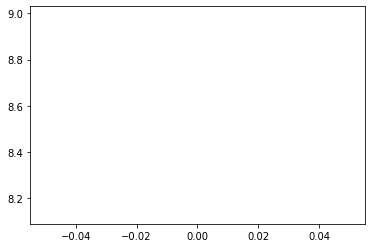

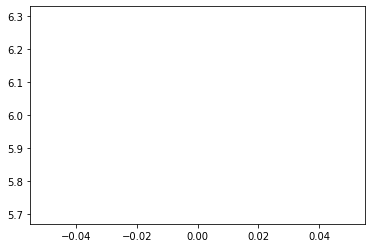

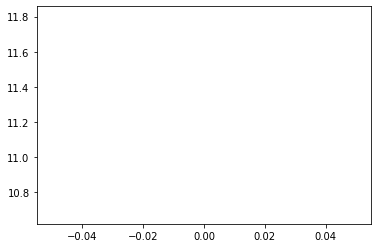

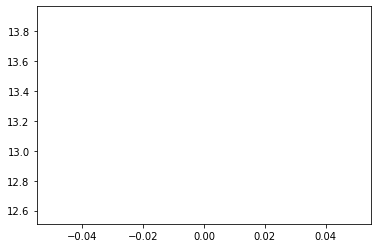

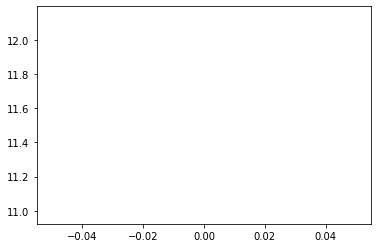

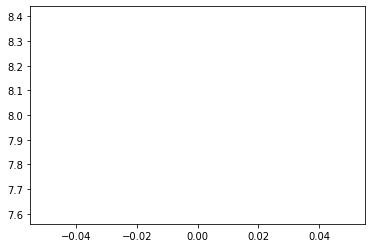

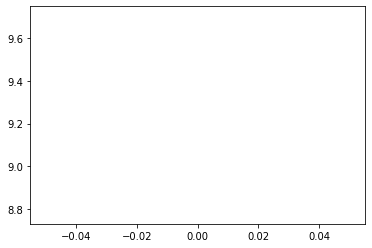

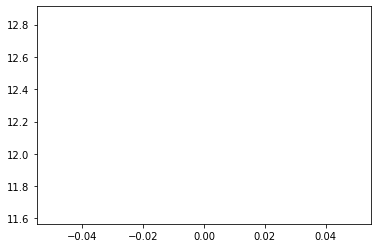

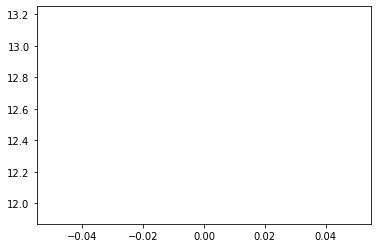

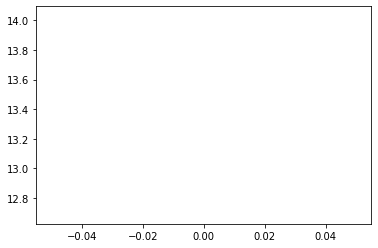

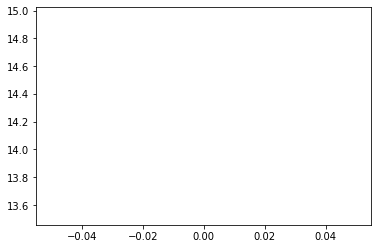

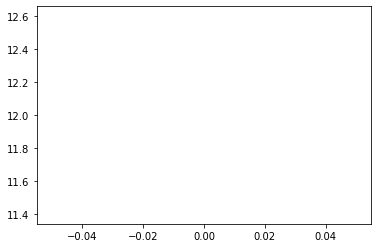

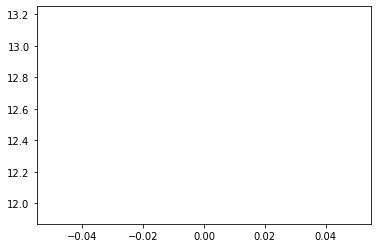

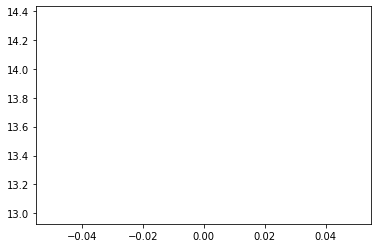

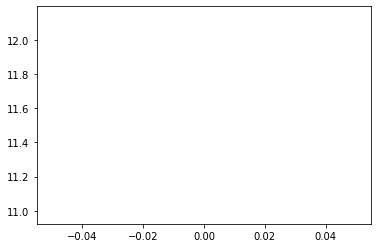

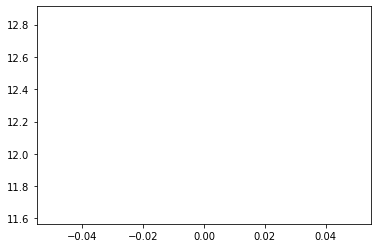

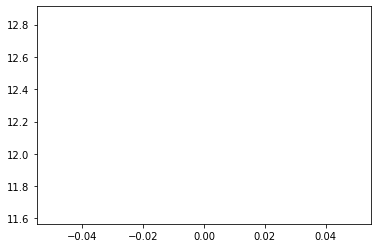

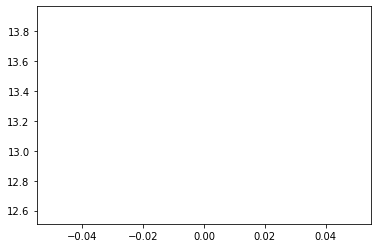

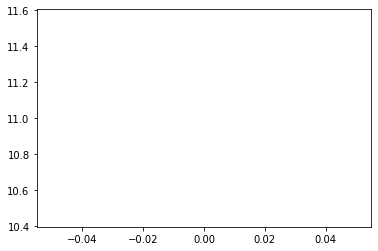

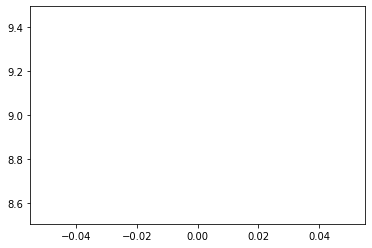

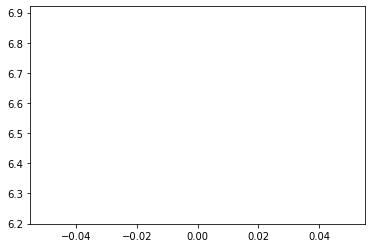

In [28]:
for i in range(len(counts[0])):
    plt.plot(np.percentile(counts[i], 99, axis=0))
    plt.show()

In [29]:
np.percentile(counts[0], 99, axis=0)

0.0

In [30]:
counts[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

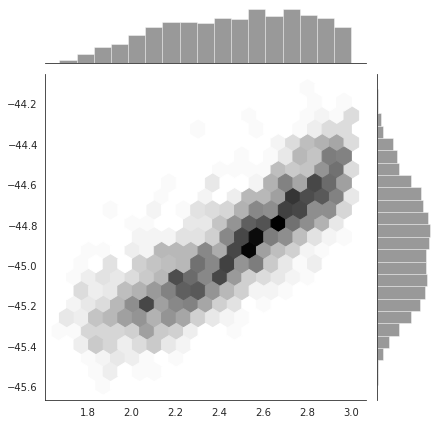

In [33]:
# x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=test[0], y=test[1], kind="hex", color="k");

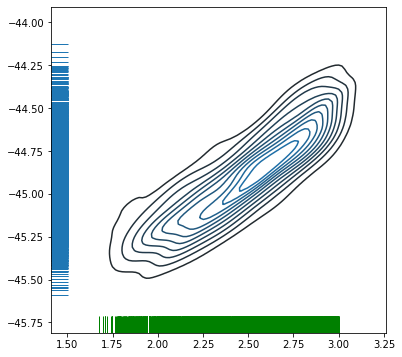

In [34]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(test[0], test[1], ax=ax)
sns.rugplot(test[0], color="g", ax=ax)
sns.rugplot(test[1], vertical=True, ax=ax);

In [35]:
test_df = pd.DataFrame()
test_df['x'] = test[0]
test_df['y'] = test[1]

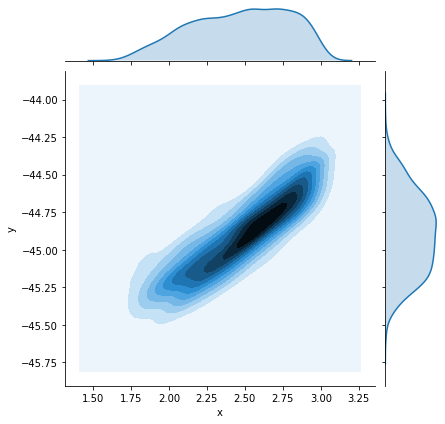

In [36]:
sns.jointplot(x="x", y="y", data=test_df, kind="kde");

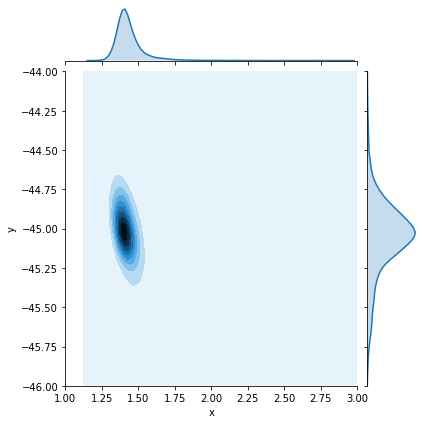

In [37]:
items = [13, 41, 45]
def get_p_i(i):
    return get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
posteriors = [get_p_i(item) for item in items]
test_df = pd.DataFrame()

test_df['x'] = np.concatenate([p[0] for p in posteriors])
test_df['y'] = np.concatenate([p[1] for p in posteriors])
sns.jointplot(x="x", y="y", data=test_df, kind="kde",
             ylim = [-46,-44],
             xlim = [1,3]);


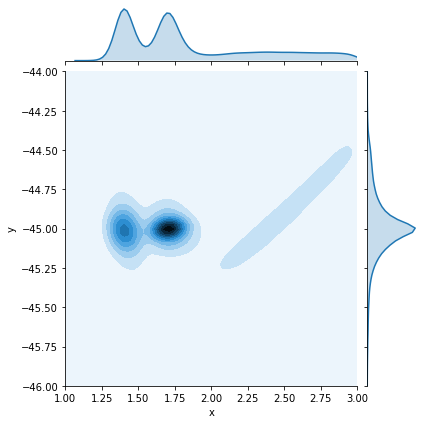

In [38]:
%time
items = results.keys()
def get_p_i(i):
    return get_posterior(results[i]['samples'], results[i]['weights']).T[:2]
posteriors = [get_p_i(item) for item in items]
test_df = pd.DataFrame()

test_df['x'] = np.concatenate([p[0] for p in posteriors])
test_df['y'] = np.concatenate([p[1] for p in posteriors])
sns.jointplot(x="x", y="y", data=test_df, kind="kde",
             ylim = [-46,-44],
             xlim = [1,3]);